#Resultados TP2

##Mutacion
La idea para ver que mutacion conviene va a estar dividida en 2 partes. Primero un analisis unicamente de probabilidades de mutacion uniformes y luego con probabilidades no uniformes

Configuracion inicial:
{
  "clase": "DEFENSOR",
  "n": 100,
  "K": 20,
  "A": 0.5,
  "B": 0.5,
  "metodo1": "ruleta",
  "metodo2": "ruleta",
  "metodo3": "ruleta",
  "metodo4": "ruleta",
  "condicion_corte": {
    "tipo": "estructura",
    "MAX_FITNESS": 40,
    "GENERACIONES_IGUALES": 0.9,
    "GENERACIONES_SIN_CAMBIO": 3,
    "GENERACIONES_IGUAL_FITNESS": 6,
    "MAX_GENERACION": 10000
  },
  "seleccion": {
    "TORNEO_DETERMINISTICO_MUESTRA": 2,
    "TORNEO_PROBABILISTICO_THRESHOLD": 0.7
  },
  "cruce": {"probabilidadUniforme": 0.4},
  "probabilidad_mutacion" : 0.7,
  "rango": {
    "min": 0.2,
    "max": 2
  },
  "favorecer_jovenes": true,
  "metodo_cruce": "un_punto",
  "funcion_no_uniforme": null,
  "factor": 0.01,
  "T_C" : 10,
  "T_0" : 200 ,
  "T_K" : 0.03
}

Esta configuracion utiliza un unico metodo de seleccion que es la ruleta clasica, con una poblacion de 100 individuos, un K de 20, la clase DEFENSOR y vamos a dejarlo funcionar durante 100 generaciones.

La idea es ver para cada probabilidad de mutacion 4 datos: el promedio de fitness, el maximo fitness, el minimo fitness y la varianza de fitness para asi poder decidir que configuracion de mutacion nos conviene utilizar


In [2]:
import matplotlib.pyplot as plt

def graficar_barras_con_colores(datos, labels, xlabel, ylabel, title, varianzas, miny=None, maxy=None):
    # Verificar que los datos y las etiquetas tengan la misma longitud
    if len(datos) != len(labels):
        raise ValueError("La longitud de los datos y las etiquetas debe ser la misma.")

    # Crear la figura y el eje
    x = np.arange(len(labels))
    width = 0.5

    fig, ax = plt.subplots()
    if varianzas is None:
        ax.bar(x, datos, width)
    else:
        ax.bar(x, datos, width, yerr=varianzas, capsize=5)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)


    # Establecer las etiquetas de las barras
    ax.set_xticks(range(len(datos)))
    ax.set_xticklabels(labels)
    
    if miny is not None and maxy is not None:
        plt.ylim(miny, maxy)
    plt.title(title)

    # Mostrar la gráfica
    plt.show()

In [3]:
import json
import numpy as np
from TP2.main import *



In [4]:



#probabiliadd de mutacion en 0.7 y el resto arbitrario
#tenemos 8 mutaciones a analizar:
#   gen, multigen, completa, limitada. uniforme y no uniforme.

#Elegimos warrior y defensa aribitrario 

#El resultado -> ver que metodo de mutacion es el mejor. -> para ese metodo ver que % es el mejor.
resultados = []
varianzas = []
gen = []
metodos_mutacion = ["gen","multigen","completa","limitada"]
for metodo in metodos_mutacion:
    crear_configuracion_mutacion(0.5, metodo, None)
    with open('custom_config.json', 'r') as file:
        custom_config = json.load(file)
        simulacion = np.array(simular_100_veces(custom_config))
        resultados.append(np.mean(simulacion[:, 2]))
        gen.append(np.mean(simulacion[:, 0]))
        varianzas.append(np.var(simulacion[:,2]))


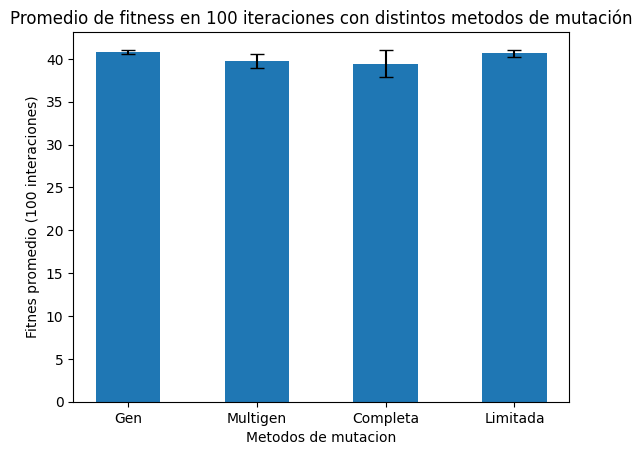

[40.78257323819762, 39.76467973008052, 39.44739007712766, 40.62708280540662]


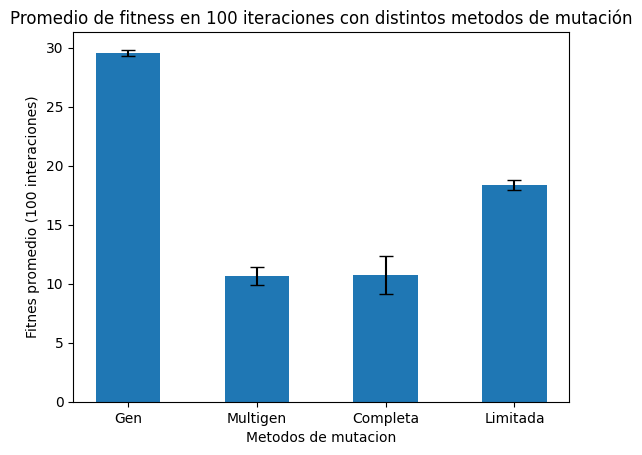

[29.56, 10.65, 10.74, 18.34]


In [5]:

graficar_barras_con_colores(resultados, ["Gen","Multigen","Completa","Limitada"], "Metodos de mutacion", "Fitnes promedio (100 interaciones)", "Promedio de fitness en 100 iteraciones con distintos metodos de mutación", varianzas)
print(resultados)

graficar_barras_con_colores(gen, ["Gen","Multigen","Completa","Limitada"], "Metodos de mutacion", "Fitnes promedio (100 interaciones)", "Promedio de fitness en 100 iteraciones con distintos metodos de mutación", varianzas)
print(gen)


#Estamos viendo que metodo de mutacion es el que mejor fitness promedio nos da. Se puede ver que 
# no depende tanto del metodo.

#CHECKEAR SI ESTA OK GRAFICAR SOLO EL PROMEDIO O TAMBIEN MAXIMOS MINIMOS 

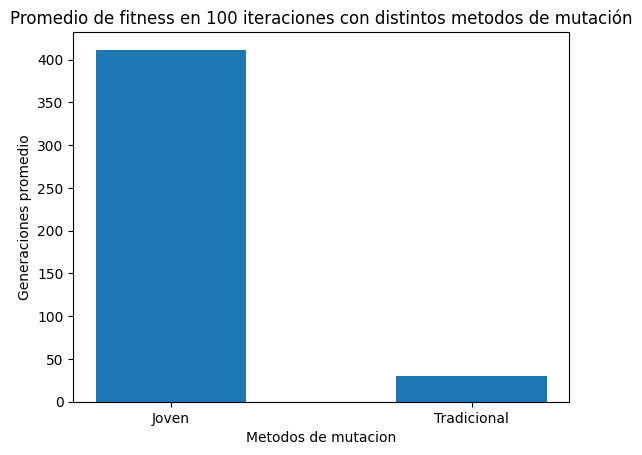

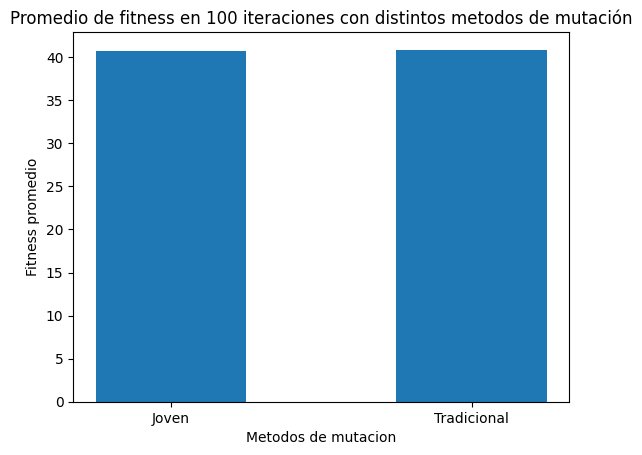

[411.48, 29.87]


In [6]:
#Ver si es mejor tradicional o joven (FIJAMOS GEN)

resultados = []
fitnessPromedio = []
crear_configuracion_sesgo(True)
with open('custom_config.json', 'r') as file:
    custom_config = json.load(file)
    simulacion = np.array(simular_100_veces(custom_config))
    resultados.append(np.mean(simulacion[:, 0]))
    fitnessPromedio.append(np.mean(simulacion[:,2]))

crear_configuracion_sesgo(False)
with open('custom_config.json', 'r') as file:
    custom_config = json.load(file)
    simulacion = np.array(simular_100_veces(custom_config))
    resultados.append(np.mean(simulacion[:, 0]))
    fitnessPromedio.append(np.mean(simulacion[:,2]))
        
graficar_barras_con_colores(resultados, ["Joven", 'Tradicional'], "Metodos de mutacion", "Generaciones promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de mutación", None)

graficar_barras_con_colores(fitnessPromedio, ["Joven", 'Tradicional'], "Metodos de mutacion", "Fitness promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de mutación", None)
print(resultados)


#Viendo el grafico se puede ver que luego de 100 iteraciones se consige el mismo fitness promedio  pero en el caso del sesgo joven, se consigue en mayor cantidad de generaciones (tarda mas en converger y llega al mismo resultado -> mas lento)


[ 16.  54.  22.  22.  29.  85.  41.  25.  90.  67.  20.  38.  19.  84.
  32.  33. 130.  33.   5.  24.  49. 123. 117.  65.  81.  64.  27.  59.
  20.  94.  35.  72.  12. 120.  20.  67.  56.  61.  37.  12.  36.  32.
 110.  17.  23.  39.  60.  21.  27.  39. 123.  88.  66.   6.  41.  71.
  11.  70.  49.   6.  84.  31.  39.  26.  75.  37.  68.  14.  51.  69.
  53.  61.  15.  37.  61.  57.  66.  33.  41.  58.  32.  79.  65.  22.
  22.  29.  60.  22.  65.  64. 113.  65.  54.  67.  43.  29.  59.  28.
  88.  55.] 849.0976
[ 27.  42.  31.  35.  89.  32.  41.  27.  89.  66.  40.  39.  30.  63.
  62.  19.  10. 114. 110.  24.  68.  42.  39. 106.  24.  69.  58.  31.
  19.  33. 113.  15.  28.  14.  21.  19.  48.  50.  65.  72.  38.  52.
  39.  34.  17.  40.  50.  23. 113.  36.  24.  73.  29.  44.  60.  41.
  51.  42.  13.  23.  77.  90.  46.  41.  15.  61.  44.  43.   8.  36.
  15.  13.  87.  44.  12.  22.  89.   9.   8.  76.  39.  51.  19.  78.
  55.  10.  37.  53.  66.  44.  12.   6.  87.  53.  28. 

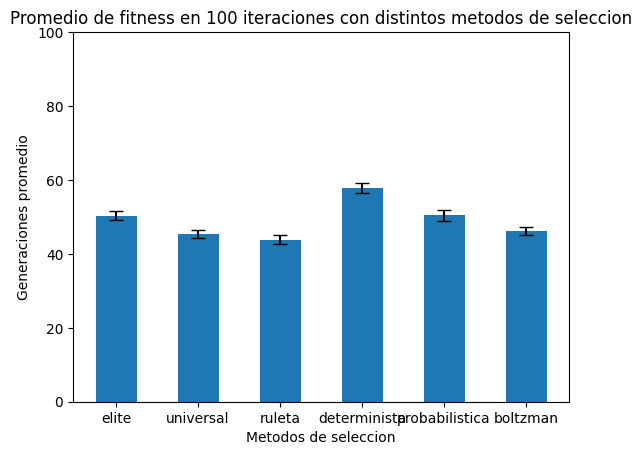

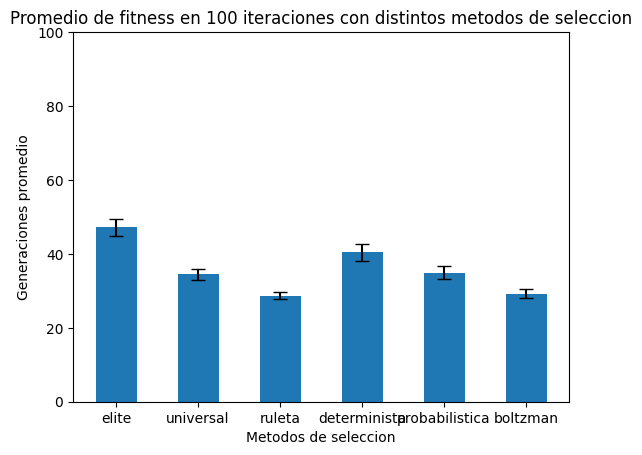

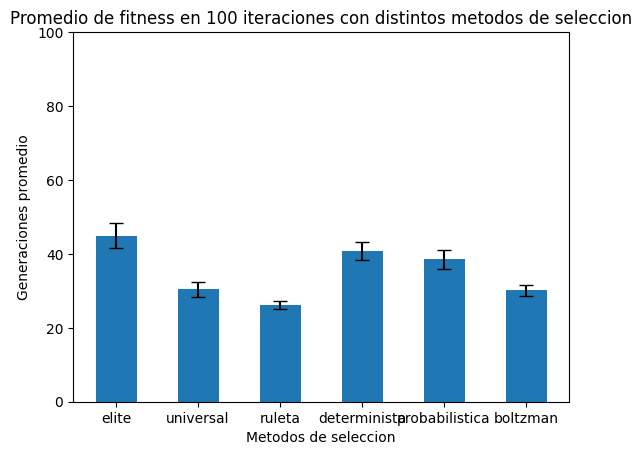

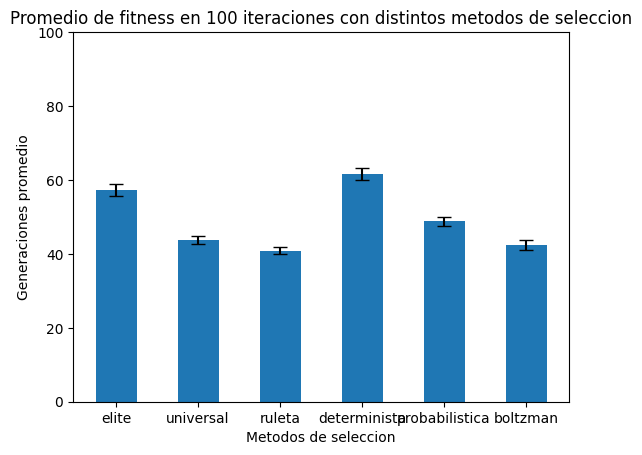

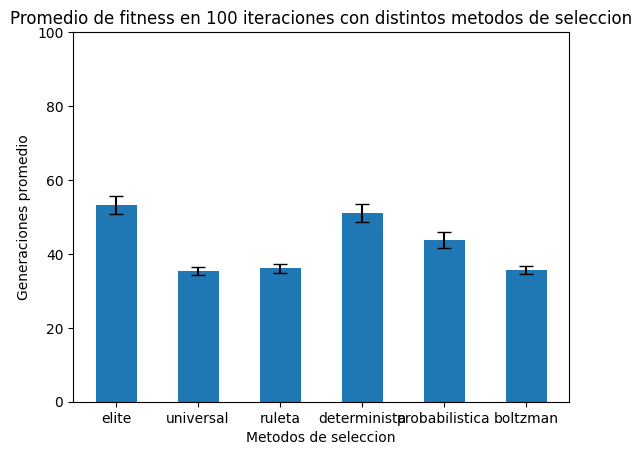

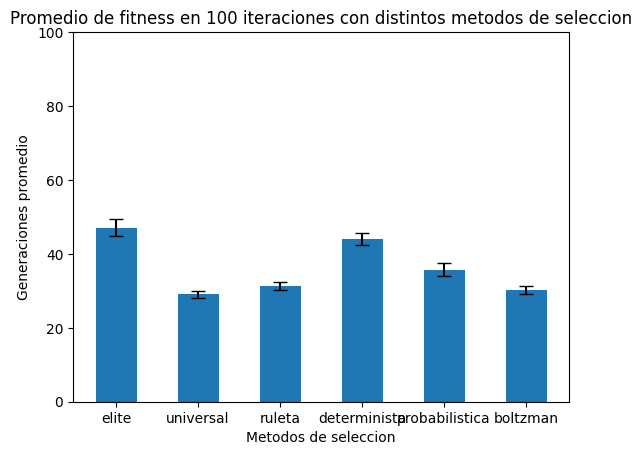

                elite  universal  ruleta  determinista  probabilistica  \
elite           50.32      45.43   43.85         57.87           50.40   
universal       47.14      34.44   28.70         40.38           34.94   
ruleta          44.91      30.42   26.12         40.71           38.57   
determinista    57.30      43.74   40.91         61.73           48.77   
probabilistica  53.24      35.36   36.06         51.13           43.75   
boltzman        47.13      29.02   31.19         44.06           35.69   

                boltzman  
elite              46.24  
universal          29.24  
ruleta             30.15  
determinista       42.51  
probabilistica     35.60  
boltzman           30.24  


In [7]:
import pandas as pd

#Tipos de seleccion
#Agarramos 
metodos_seleccion = ["elite", "universal", "ruleta", "determinista", "probabilistica", "boltzman"]

resultados = []
varianza = []
for metodo1 in metodos_seleccion:
    resultados_metodo = []
    varianza_metodo = []
    for metodo2 in metodos_seleccion:
        crear_configuracion_seleccion(metodo1, metodo2)
        with open('custom_config.json', 'r') as file:
            custom_config = json.load(file)
            simulacion = np.array(simular_100_veces(custom_config))
            resultados_metodo.append(np.mean(simulacion[:, 0]))
            varianza_metodo.append(np.var(simulacion[:, 0]))
            print(simulacion[:, 0], np.var(simulacion[:, 0]))
    resultados.append(resultados_metodo) 
    varianza.append(varianza_metodo)
    
for i, res in enumerate(resultados):
    #para normalizar la varianza vamos a dividirla por la minima
    varianza_minima = min(varianza[i])
    titulo = "Promedio del generaciones del metodo " + metodos_seleccion[i] + " iterado 100 veces usando distintos metodos de selección"
    graficar_barras_con_colores(res, metodos_seleccion, "Metodos de seleccion", "Generaciones promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de seleccion", varianza[i]/varianza_minima, 0, 100)
    
df_resultados = pd.DataFrame(resultados, columns=metodos_seleccion, index=metodos_seleccion)

print(df_resultados)

#Nos esta dando una varianza gigantesca. 
#Conclusion: Depende mucho de la tirada pero suele ser elite con universal. CHECKEAR

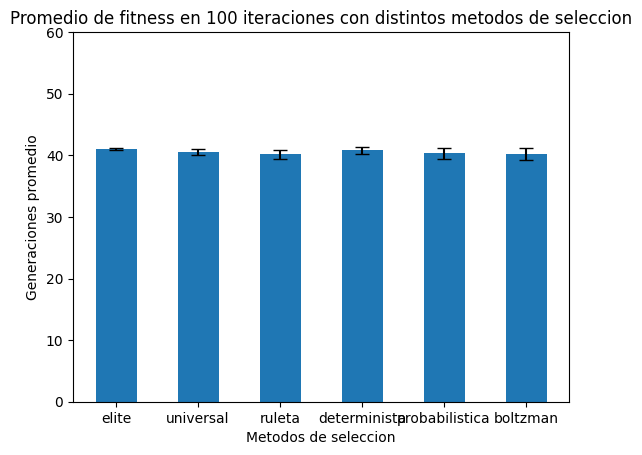

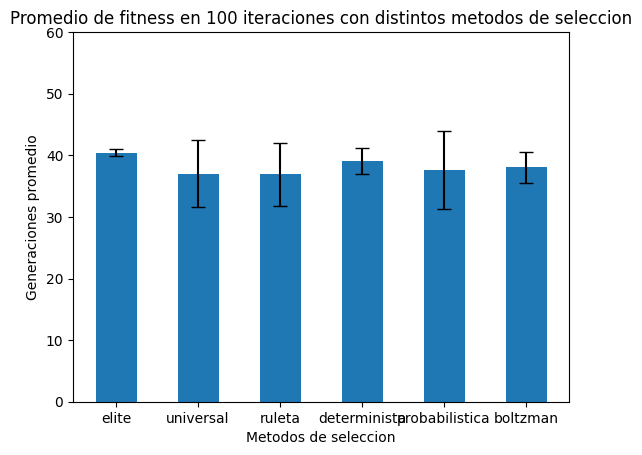

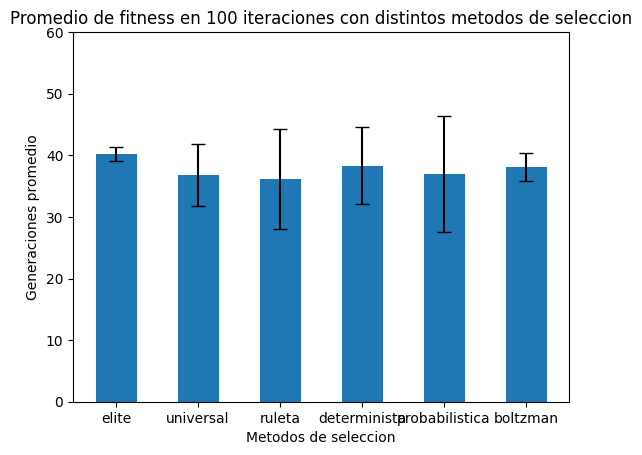

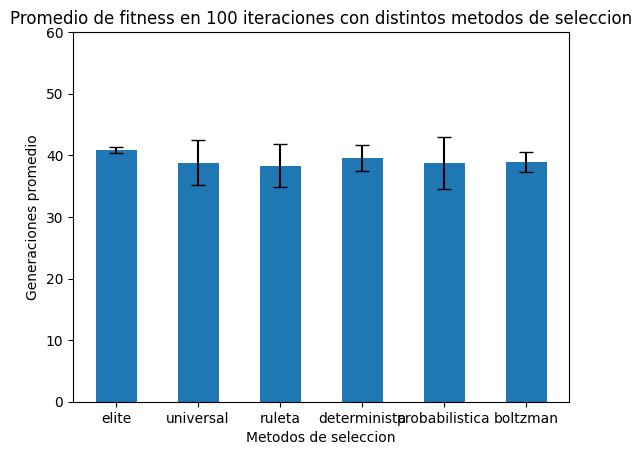

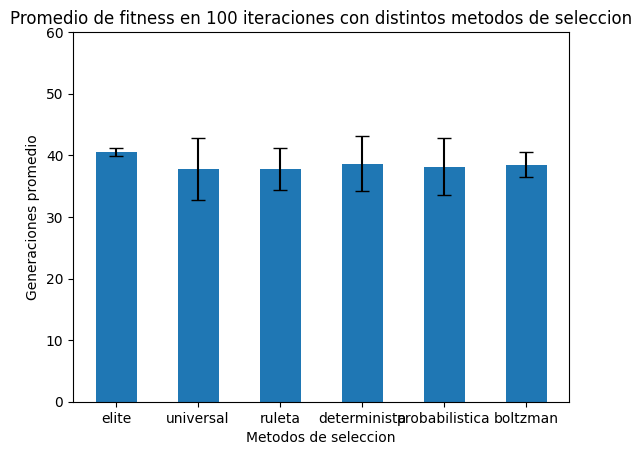

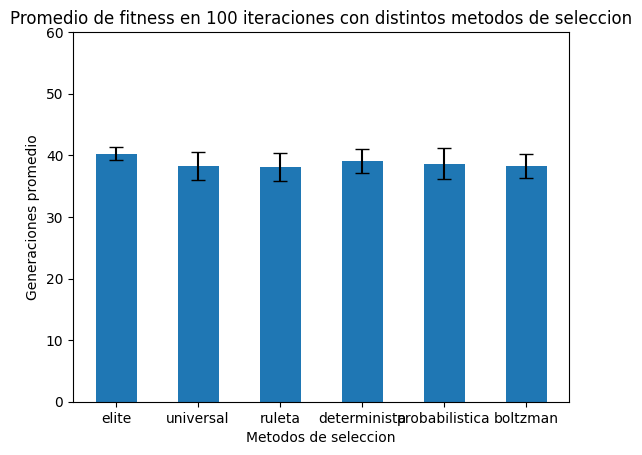

                    elite  universal     ruleta  determinista  probabilistica  \
elite           41.082115  40.546323  40.164969     40.790708       40.322107   
universal       40.446870  37.018908  36.894536     39.012240       37.599006   
ruleta          40.202803  36.794402  36.145966     38.282706       36.962600   
determinista    40.791750  38.809553  38.300235     39.522392       38.697709   
probabilistica  40.525527  37.815259  37.777727     38.620417       38.184387   
boltzman        40.279793  38.244257  38.120306     39.005245       38.660767   

                 boltzman  
elite           40.231805  
universal       38.027318  
ruleta          38.135808  
determinista    38.945606  
probabilistica  38.496988  
boltzman        38.264011  


In [8]:
#Metodos de reemplazo
#Repetir similar al anterior pero eligiendo ya los metodos 1 y 2, misma secuencia pero para los 3 y 4. 
#Elegimos boltzmann y universal como metodos de seleccion
metodos_seleccion = ["elite", "universal", "ruleta", "determinista", "probabilistica", "boltzman"]

resultados = []
varianza = []
for metodo3 in metodos_seleccion:
    resultados_metodo = []
    varianza_metodo = []
    for metodo4 in metodos_seleccion:
        crear_configuracion_reemplazo(metodo3, metodo4)
        with open('custom_config.json', 'r') as file:
            custom_config = json.load(file)
            simulacion = np.array(simular_100_veces(custom_config))
            resultados_metodo.append(np.mean(simulacion[:, 2]))
            varianza_metodo.append(np.var(simulacion[:, 2]))
            # print(simulacion[:, 0], np.var(simulacion[:, 0]))
    resultados.append(resultados_metodo) 
    varianza.append(varianza_metodo)
    
for i, res in enumerate(resultados):
    titulo = "Promedio del generaciones del metodo " + metodos_seleccion[i] + " iterado 100 veces usando distintos metodos de selección"
    graficar_barras_con_colores(res, metodos_seleccion, "Metodos de seleccion", "Generaciones promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de seleccion", varianza[i],0,60)
    
df_resultados = pd.DataFrame(resultados, columns=metodos_seleccion, index=metodos_seleccion)

print(df_resultados)

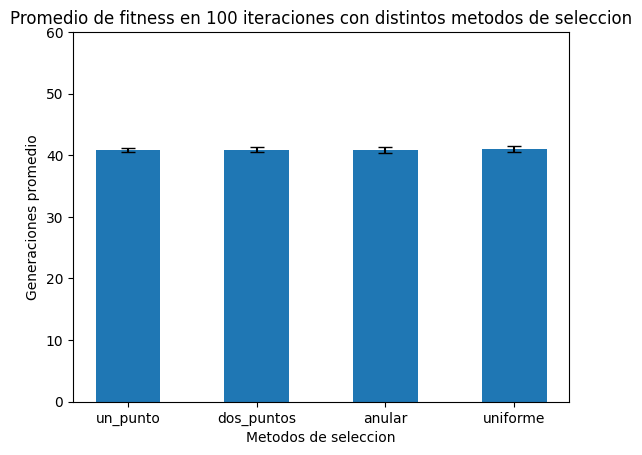

[40.890811571342326, 40.90893757550216, 40.77734402444384, 40.95623069333473]


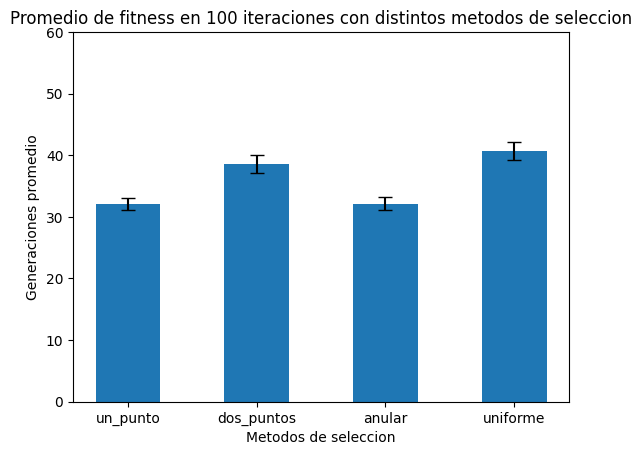

[32.03, 38.52, 32.15, 40.67]


In [13]:
#elegimos de metodos de reemplazo (3 y 4) a elite y determinista

metodos_cruce = ["un_punto", "dos_puntos", "anular", "uniforme"]

resultados = []
generaciones = []
varianza = []
varianza_gen = []
for metodo in metodos_cruce:
    crear_configuracion_cruce(metodo)
    with open('custom_config.json', 'r') as file:
        custom_config = json.load(file)
        simulacion = np.array(simular_100_veces(custom_config))
        resultados.append(np.mean(simulacion[:, 2]))
        generaciones.append(np.mean(simulacion[:, 0]))
        varianza.append(np.var(simulacion[:, 2]))
        varianza_gen.append(np.var(simulacion[:, 0]))

graficar_barras_con_colores(resultados, metodos_cruce, "Metodos de seleccion", "Generaciones promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de seleccion", varianza,0,60)
print(resultados)

min_varianza_gen = min(varianza_gen)
graficar_barras_con_colores(generaciones, metodos_cruce, "Metodos de seleccion", "Generaciones promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de seleccion", varianza_gen/min_varianza_gen,0,60)
print(generaciones)